<a href="https://colab.research.google.com/github/vilsonrodrigues/DigitalImageProcessing/blob/main/DigitalImageProcessing/DCA0445/lesson3-labeling/pdi_lesson3_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question: "Observando-se o programa labeling.cpp como exemplo, é possível verificar que caso existam mais de 255 objetos na cena, o processo de rotulação poderá ficar comprometido. Identifique a situação em que isso ocorre e proponha uma solução para este problema."

Answer: Como o algoritmo prevê no máximo 255 tons de cinza, a solução seria usar uma imagem em um formato diferente para processar mais que 255 regiões.

Question 2: "Aprimore o algoritmo de contagem apresentado para identificar regiões com ou sem buracos internos que existam na cena. Assuma que objetos com mais de um buraco podem existir. Inclua suporte no seu algoritmo para não contar bolhas que tocam as bordas da imagem. Não se pode presumir, a priori, que elas tenham buracos ou não."

Lesson 3: Count regions with and without rules

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read image

In [ ]:
img = cv2.imread("bolhas.png", cv2.IMREAD_GRAYSCALE)

Dimensions

In [ ]:
img.shape

(256, 256)

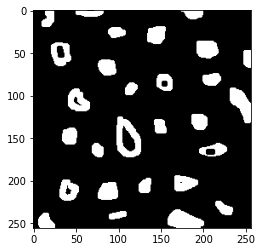

In [ ]:
plt.imshow(img,cmap = 'gray')

Remove regions in edges

In [ ]:
def noBubblesEdge(img):

  shape = np.shape(img)

  copy_img = img.copy()

  for i in list([0, shape[0]-1]):
    for j in range(0, shape[1]):
      if(copy_img[i][j] == 255):
        cv2.floodFill(image=copy_img, seedPoint=(j, i), newVal=0, mask=None)

  for i in range(0, shape[0]):
    for j in list([0, shape[1]-1]):
      if(copy_img[i][j] == 255):
        cv2.floodFill(image=copy_img, seedPoint=(j, i), newVal=0, mask=None)

  return copy_img

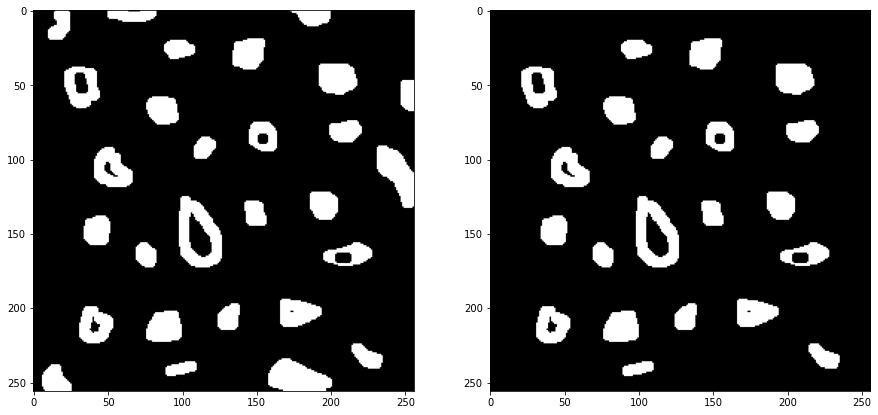

In [ ]:
img_noEdge = noBubblesEdge(img)

# ploting image #
f, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plotando a imagem #
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(img_noEdge, cmap = 'gray')

plt.show()

First, count num bubbles. 

For this problem, we apply 255 in background, after, we can make a count num of holes.

To obtain num bubbles without holes, subtract num_bubbles - num_holes



In [ ]:
def countHolesBubbles(img):
    
    b_objects = 0
    b_holes = 0

    shape = np.shape(img)

    copy_img = img.copy()

    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            if copy_img[i][j] == 255:
                b_objects += 1                
                cv2.floodFill(image=copy_img, seedPoint=(j, i), newVal=(b_objects), mask=None)
    
    # Filling the background
    copy_img = img.copy()
    cv2.floodFill(image=copy_img, seedPoint=(0, 0), newVal=(255), mask=None)

    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            if(copy_img[i][j] == 0):
                b_holes += 1       
                cv2.floodFill(image=copy_img, seedPoint=(j, i), newVal=(255), mask=None)

    print("Num bubbles: {}".format(b_objects))
    print("Num bubbles with holes: {}".format(b_holes))
    print("Num bubbles without holes: {}".format(b_objects - b_holes))

In [ ]:
countHolesBubbles(img_noEdge)

Num bubbles: 21
Num bubbles with holes: 7
Num bubbles without holes: 14
